In [1]:
from datetime import timedelta

In [2]:
import pandas as pd
df=pd.read_csv('takehome_user_engagement.csv')
df.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [3]:
df['time_stamp']=pd.to_datetime(df['time_stamp'])

In [4]:
df['date']=df['time_stamp'].dt.date
df.date

0         2014-04-22
1         2013-11-15
2         2013-11-29
3         2013-12-09
4         2013-12-25
             ...    
207912    2013-09-06
207913    2013-01-15
207914    2014-04-27
207915    2012-06-02
207916    2014-01-26
Name: date, Length: 207917, dtype: object

In [5]:
def adoption(df, days=7, logins=2):
    df['date'] = df['time_stamp'].dt.date
    df = df.drop_duplicates(subset='date').sort_values('date')
    passed_days = df['date'].diff(periods=logins)
    return any(passed_days <= timedelta(days=days))

In [6]:
adoption_done=df.groupby('user_id').apply(adoption)
df['adopted_user']=adoption_done

In [7]:
df

,time_stamp,user_id,visited,date,adopted_user
0,2014-04-22 03:53:30,1,1,2014-04-22,NaN
1,2013-11-15 03:45:04,2,1,2013-11-15,False
2,2013-11-29 03:45:04,2,1,2013-11-29,True
3,2013-12-09 03:45:04,2,1,2013-12-09,False
4,2013-12-25 03:45:04,2,1,2013-12-25,False
...,...,...,...,...,...
207912,2013-09-06 06:14:15,11996,1,2013-09-06,NaN
207913,2013-01-15 18:28:37,11997,1,2013-01-15,NaN
207914,2014-04-27 12:45:16,11998,1,2014-04-27,NaN
207915,2012-06-02 11:55:59,11999,1,2012-06-02,NaN


In [8]:
final=df[df['adopted_user']==True][['user_id','adopted_user']]
final.drop_duplicates(subset='user_id',inplace=True)
final.reset_index(drop=True, inplace=True)
final.set_index('user_id',inplace=True)

In [30]:
df1=pd.read_csv('takehome_users.csv',encoding='latin-1')
df1.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [31]:
df1['invited_by_user_id'].fillna(0,inplace=True)

In [32]:
res=df1.join(final,on='object_id')
res.head(10)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,NaN
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,True
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,NaN
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,NaN
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,NaN
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0,NaN
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,0.0,NaN
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,0.0,NaN
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,0.0,NaN
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0,True


In [33]:
res['adopted_user'].fillna(0,inplace=True)

In [34]:
res['adopted_user'].replace(True,1,inplace=True)

In [35]:
res.dtypes

object_id                       int64
creation_time                  object
name                           object
email                          object
creation_source                object
last_session_creation_time    float64
opted_in_to_mailing_list        int64
enabled_for_marketing_drip      int64
org_id                          int64
invited_by_user_id            float64
adopted_user                    int64
dtype: object

In [36]:
res.drop(columns=['creation_time', 'last_session_creation_time'],inplace=True)
res['invited_by_user_id']=res['invited_by_user_id'].astype('int64')

In [37]:
res.isnull().sum()

object_id                     0
name                          0
email                         0
creation_source               0
opted_in_to_mailing_list      0
enabled_for_marketing_drip    0
org_id                        0
invited_by_user_id            0
adopted_user                  0
dtype: int64

In [38]:
res.drop(columns=['object_id', 'name','email'],inplace=True)

In [39]:
res.drop(columns=['org_id'],inplace=True)

In [40]:
c=res['invited_by_user_id']>0
res.loc[c,'invited_by_user_id'] = 1
res

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,invited_by_user_id,adopted_user
0,GUEST_INVITE,1,0,1,0
1,ORG_INVITE,0,0,1,1
2,ORG_INVITE,0,0,1,0
3,GUEST_INVITE,0,0,1,0
4,GUEST_INVITE,0,0,1,0
...,...,...,...,...,...
11995,ORG_INVITE,0,0,1,0
11996,SIGNUP_GOOGLE_AUTH,0,0,0,0
11997,GUEST_INVITE,1,1,1,0
11998,PERSONAL_PROJECTS,0,0,0,0


In [41]:
# res[res['invited_by_user_id']==1 & res['adopted_user']==1]
len(res[(res['invited_by_user_id']==1) & (res['adopted_user']==1)] )/len(res[res['adopted_user']==1])

0.592814371257485

In [42]:
res['creation_source'].unique()

array(['GUEST_INVITE', 'ORG_INVITE', 'SIGNUP', 'PERSONAL_PROJECTS',
       'SIGNUP_GOOGLE_AUTH'], dtype=object)

In [43]:
res = pd.get_dummies(res, columns = ['creation_source'])
res

,opted_in_to_mailing_list,enabled_for_marketing_drip,invited_by_user_id,adopted_user,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1,0,1,0,1,0,0,0,0
1,0,0,1,1,0,1,0,0,0
2,0,0,1,0,0,1,0,0,0
3,0,0,1,0,1,0,0,0,0
4,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
11995,0,0,1,0,0,1,0,0,0
11996,0,0,0,0,0,0,0,0,1
11997,1,1,1,0,1,0,0,0,0
11998,0,0,0,0,0,0,1,0,0


In [44]:
from imblearn.combine import SMOTEENN
import numpy as np
ds=res.drop(columns=['adopted_user'])
X=ds.values
y=res['adopted_user'].values
print(X.shape,y.shape)

smt = SMOTEENN(sampling_strategy='all')
X_smt, y_smt = smt.fit_resample(X, y)
print(X_smt.shape,y_smt.shape)

pd.DataFrame(y_smt).value_counts()

(12000, 8) (12000,)
(4567, 8) (4567,)


0    4567
dtype: int64

In [45]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(sampling_strategy={0: 20})
X_cc, y_cc = cc.fit_resample(X, y)

from imblearn.over_sampling import SMOTE


smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X_cc, y_cc)

pd.DataFrame(y_sm).value_counts()

0    167
1    167
dtype: int64

In [46]:
X_sm.shape,X_cc.shape,y_cc.shape

((334, 8), (187, 8), (187,))

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2,random_state=5)

In [57]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth 
dt = DecisionTreeClassifier(max_depth=6)

# Fit dt to the training set
dt.fit(X_train, y_train) # it will ask all possible questions, compute the information gain and choose the best split

# Predict test set labels
y_pred = dt.predict(X_test)
y_pred

array([1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1])

In [58]:
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve
acc = roc_auc_score(y_test, y_pred)
print("Test set auc: {:.2f}".format(acc))

Test set auc: 0.92


In [59]:
importance = dt.feature_importances_
list(zip(importance,ds.columns))

[(0.2800563953894817, 'opted_in_to_mailing_list'),
 (0.41437359237163035, 'enabled_for_marketing_drip'),
 (0.0, 'invited_by_user_id'),
 (0.04747570728394588, 'creation_source_GUEST_INVITE'),
 (0.017079660841132077, 'creation_source_ORG_INVITE'),
 (0.02619420262930025, 'creation_source_PERSONAL_PROJECTS'),
 (2.0630922678810517e-18, 'creation_source_SIGNUP'),
 (0.21482044148450968, 'creation_source_SIGNUP_GOOGLE_AUTH')]

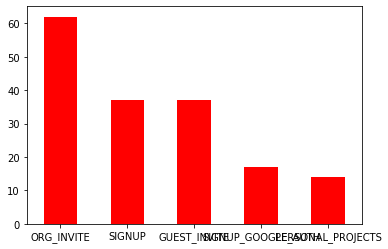

In [60]:
from matplotlib import pyplot as plt
p=df1.join(final,on='object_id')
p=p[p['adopted_user']==1]
p['creation_source'].value_counts().plot(kind = 'bar',rot = 0,color='r')

This data has absolute_user as a target. The unique values such as name, user_id,email,org_id details are dropped from feature. 
The features used to predit the target and their importances are:
(0.27832933548310645, 'opted_in_to_mailing_list'),

 (0.4118182212769962, 'enabled_for_marketing_drip'),

 (1.080005082342736e-05, 'invited_by_user_id'),

 (0.031193247079817868, 'creation_source_GUEST_INVITE'),

 (0.03287479366493445, 'creation_source_ORG_INVITE'),

 (0.03218869642972324, 'creation_source_PERSONAL_PROJECTS'),

 (8.922546276342281e-05, 'creation_source_SIGNUP'),

 (0.21349568055183485, 'creation_source_SIGNUP_GOOGLE_AUTH')

 The Roc score without invited_by_user_id is 0.90 and the Roc curve with invited_by_user_id is 0.92.

 The invited_by_user_id values are converted into two classes:one class with id and the other with no id. So this feature used to predict the adopted_user.
 So the above mentioned factors predict the future user adoption.